In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

# 1: Implement lại các loss và r_squared bằng numpy

In [ ]:
def mse(y_true: np.array, y_pred: np.array):    
    mse = np.mean(np.square(y_true - y_pred))
    return mse

def rmse(y_true: np.array, y_pred: np.array):
    mse = np.mean(np.square(y_true - y_pred))
    rmse = np.sqrt(mse)
    return rmse

def mae(y_true: np.array, y_pred: np.array):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def mape(y_true: np.array, y_pred: np.array):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape

In [ ]:
# Các bạn có thể thử với dữ liệu ở đây
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))
print('\n\n')

1.0
1.0
0.6
26.666666666666668





# 2: Implement lại Ridge Regression

In [ ]:
class RidgeRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y, lambda_ = 0.1):        
        X = np.column_stack((np.ones(X.shape[0]), X))
        XTX = np.dot(X.T, X)
        I = np.identity(XTX.shape[0])
        self.coef_ = np.linalg.solve(XTX + lambda_ * I, np.dot(X.T, y))
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

        return self

    def predict(self, new_X):
        X = np.column_stack((np.ones(new_X.shape[0]), new_X)) 
        y_pred = np.dot(X, np.concatenate(([self.intercept_], self.coef_)))
        return y_pred

#3: Tạo dữ liệu toy_data

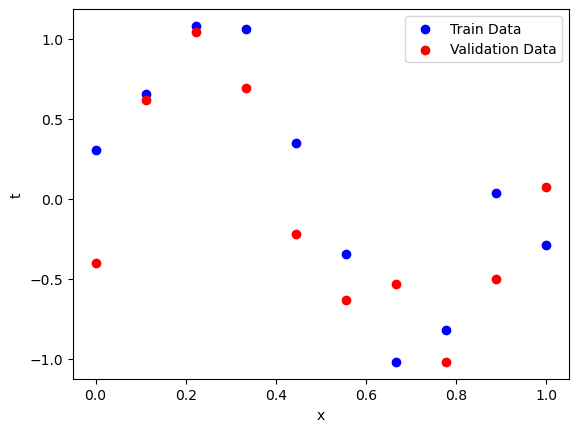

In [ ]:
def create_toy_data(func, sample_size=100, standard_deviation=0.25):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=standard_deviation, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

# Create train and validation datasets
x_train, y_train = create_toy_data(func, sample_size=10)
x_val, y_val = create_toy_data(func, sample_size=10)
# Plot train and validation data
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_val, y_val, color='red', label='Validation Data')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.show()

# 3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

Degree:  0
Train Error:  0.4768209507265402
Validation Error:  0.4424168371110425


Maybe underfitting

Degree:  1
Train Error:  0.2715437296387568
Validation Error:  0.35250494450474423


Maybe overfitting

Degree:  2
Train Error:  0.27397156838452463
Validation Error:  0.35850358752853695


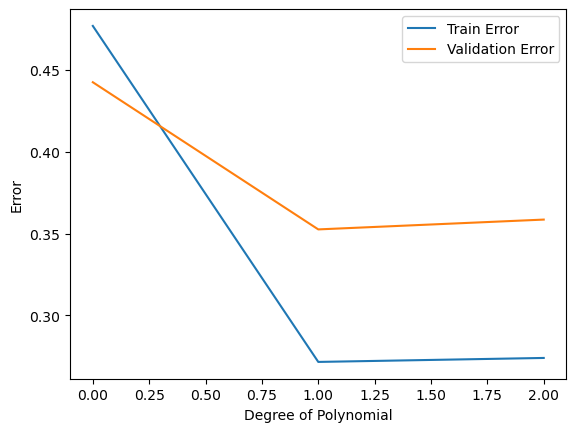

Maybe overfitting

Degree:  3
Train Error:  0.26192808008649177
Validation Error:  0.3434400207935258


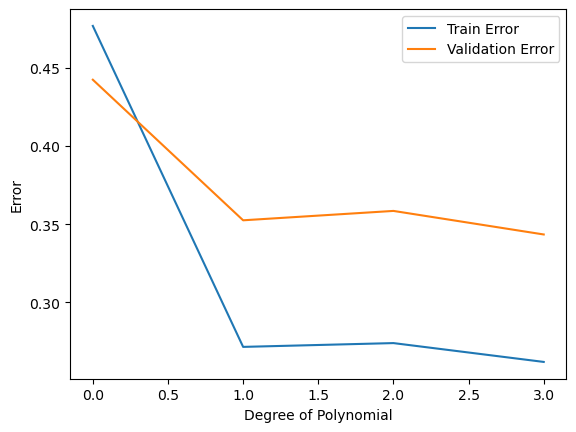

Maybe overfitting

Degree:  4
Train Error:  0.23965180543524017
Validation Error:  0.31625493674504496


Maybe overfitting

Degree:  5
Train Error:  0.22047437989764312
Validation Error:  0.29165988076114485


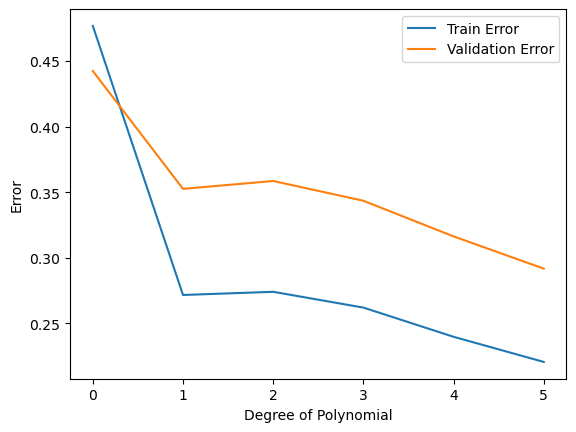

Maybe overfitting

Degree:  6
Train Error:  0.20863406599320808
Validation Error:  0.2744204907514934


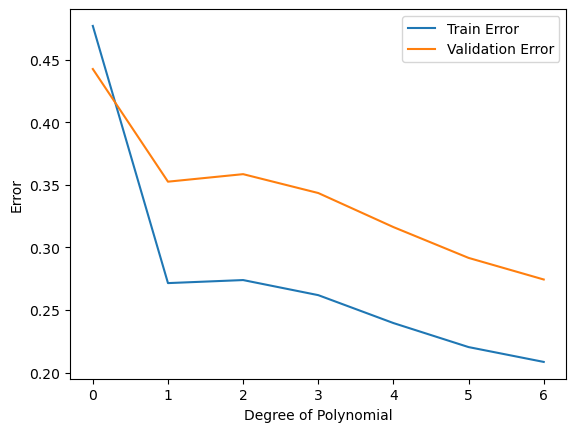

Maybe overfitting

Degree:  7
Train Error:  0.2032015009709644
Validation Error:  0.2640681248563115


Maybe overfitting

Degree:  8
Train Error:  0.20177020613080035
Validation Error:  0.2586017555258505


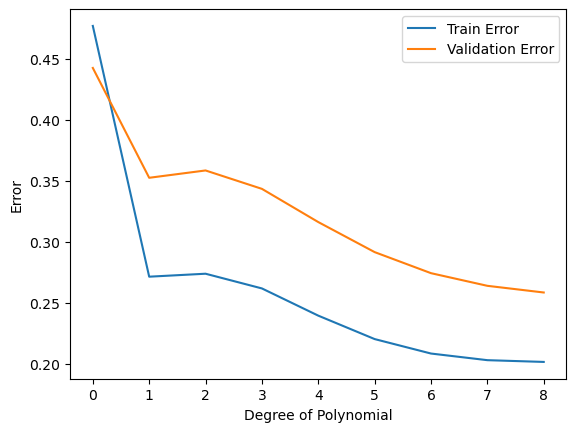

Maybe overfitting

Degree:  9
Train Error:  0.20217215558382134
Validation Error:  0.2561013911089968


Maybe overfitting



In [ ]:
degrees = np.arange(10)
train_errors = []
val_errors = []

for degree in degrees:
    # Generate polynomial features for train and validation data
    X_train = np.vander(x_train, degree + 1, increasing=True)
    X_val = np.vander(x_val, degree + 1, increasing=True)
    
    # Create Ridge Regression model
    ridge = RidgeRegression()  
    
    # Fit model 
    ridge.fit(X_train, y_train)
    
    # Predict on the train and validation data
    y_train_pred = ridge.predict(X_train)
    y_val_pred = ridge.predict(X_val)
    
    # Calculate train and validation error
    train_error = np.mean((y_train_pred - y_train)**2)
    val_error = np.mean((y_val_pred - y_val)**2)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

    print("Degree: ", degree)
    print("Train Error: ", train_error)
    print("Validation Error: ", val_error)
    
    plt.plot(train_errors, label='Train Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    
    # Check for overfitting or underfitting
    if train_error < val_error:
        print("Maybe overfitting\n")
    elif train_error > val_error:
        print("Maybe underfitting\n")
    else:
        print("Maybe good\n")



# 4: Với model đa thức bậc 9, mô hình bị overfitting, thử các cách sau để tránh overfitting:

# 4a: Tăng tập train thêm 10 điểm dữ liệu

In [ ]:
# Tạo lại x_train, y_train
x_train, y_train = create_toy_data(func, sample_size=10)
x_val, y_val = create_toy_data(func, sample_size=10)

# Tạo thêm 10 điểm dữ liệu huấn luyện
X_train_additional, y_train_additional = create_toy_data(func, sample_size=10)

# Reshape X_train và X_train_additional
X_train = np.reshape(x_train, (-1, 1))
X_train_additional = np.reshape(X_train_additional, (-1, 1))

# Thêm dữ liệu vào tập huấn luyện
X_train = np.concatenate((X_train, X_train_additional)) 
y_train = np.concatenate((y_train, y_train_additional))

# Fit mô hình Ridge Regression đa thức bậc 9
model = RidgeRegression()
model.fit(X_train, y_train, lambda_=0.1)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(x_val)

# Vẽ đồ thị dữ liệu và dự đoán
plt.scatter(X_train, y_train, color='b', label='Train Data')
plt.scatter(x_val, y_val, color='g', label='Test Data')
plt.plot(x_val, y_pred, color='r', label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Polynomial Degree 9')
plt.show()


# 4b: Tăng tập train thêm 90 điểm dữ liệu

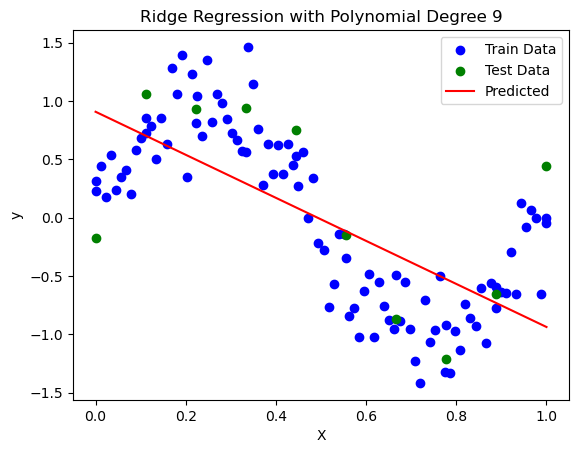

In [ ]:
# Tạo lại x_train, y_train
x_train, y_train = create_toy_data(func, sample_size=10)
x_val, y_val = create_toy_data(func, sample_size=10)

# Tạo thêm 10 điểm dữ liệu huấn luyện
X_train_additional, y_train_additional = create_toy_data(func, sample_size=90)

# Reshape X_train và X_train_additional
X_train = np.reshape(x_train, (-1, 1))
X_train_additional = np.reshape(X_train_additional, (-1, 1))

# Thêm dữ liệu vào tập huấn luyện
X_train = np.concatenate((X_train, X_train_additional)) 
y_train = np.concatenate((y_train, y_train_additional))

# Fit mô hình Ridge Regression đa thức bậc 9
model = RidgeRegression()
model.fit(X_train, y_train, lambda_=0.1)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(x_val)

# Vẽ đồ thị dữ liệu và dự đoán
plt.scatter(X_train, y_train, color='b', label='Train Data')
plt.scatter(x_val, y_val, color='g', label='Test Data')
plt.plot(x_val, y_pred, color='r', label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Polynomial Degree 9')
plt.show()

#4c: thử Ridge regression implement ở trên với các giá trị $\lambda$ khác nhau (0.1, 1, 10,...) xem giá trị nào tránh overfitting tốt nhất.